 Import the necessary libraries.

In [81]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import BASE_COLORS
%matplotlib inline
import pandas as pd
import numpy as np




In [2]:
data = pd.read_csv('marketing_customer_value_analysis.csv')
display(data.shape)
data.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
data.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [4]:
data.info

<bound method DataFrame.info of      Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  ...  \
0     Bachelor    

2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

In [5]:
numericals = data.select_dtypes(np.number)
numericals.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [6]:
numericals.isnull().sum()/len(numericals)

Customer Lifetime Value          0.0
Income                           0.0
Monthly Premium Auto             0.0
Months Since Last Claim          0.0
Months Since Policy Inception    0.0
Number of Open Complaints        0.0
Number of Policies               0.0
Total Claim Amount               0.0
dtype: float64

First look at its main features (head, shape, info). NOTE The target column is total_claim_amount

In [8]:
numericals.shape

(9134, 8)

In [9]:
numericals['Total Claim Amount'].value_counts(dropna=False)

316.800000    116
292.800000    110
312.000000    108
350.400000    105
331.200000    102
             ... 
377.442796      1
20.985105       1
280.897050      1
268.130863      1
790.784983      1
Name: Total Claim Amount, Length: 5106, dtype: int64

<Axes: >

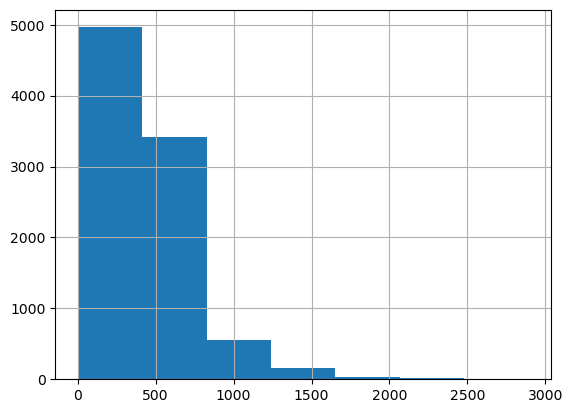

In [10]:
numericals['Total Claim Amount'].hist(bins=7)

In [11]:
numericals['Total Claim Amount'].mean()

434.0887943128969

 4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

In [12]:
numericals.columns = [col.lower().replace(' ', '_') for col in numericals.columns]

In [13]:
numericals.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

 5. Change effective to date column to datetime format.

In [73]:
data['Effective To Date'] = pd.to_datetime(data['Effective To Date'])

In [74]:
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


 6.Create a NEW dataframe using only the numerical data called numerical_df. Use this for the following questions.


In [17]:
numerical_df = numericals.select_dtypes(np.number)
numerical_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


 7.Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

In [18]:
numerical_df.nunique()

customer_lifetime_value          8041
income                           5694
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
total_claim_amount               5106
dtype: int64

In [19]:
numerical_df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


In [20]:
discrete_variables = []
continuous_variables = []
for col in numerical_df.columns:
    if len(numerical_df[col].unique()) < (numerical_df.shape[0] * 0.02):
        discrete_variables.append(col)
    else:
        continuous_variables.append(col)

        
        

 8. Plot a correlation matrix, comment what you see.

In [21]:
correlations = numerical_df.corr()
correlations

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


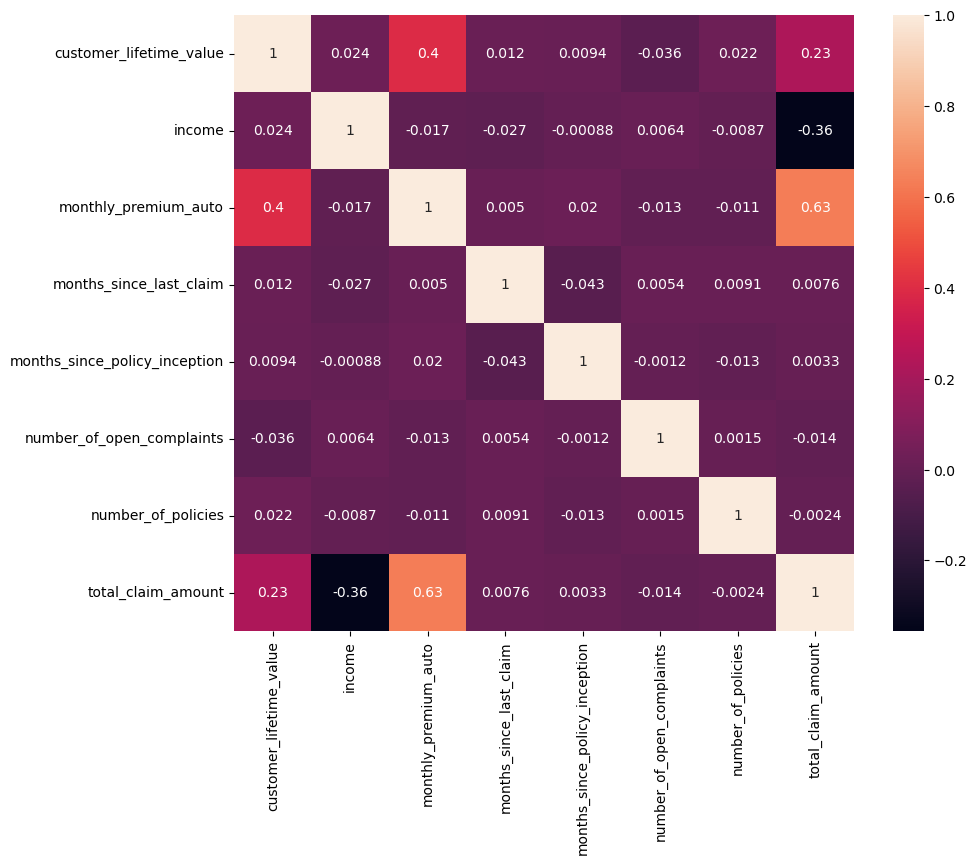

In [22]:
fig, ax=plt.subplots(figsize=(10,8))
ax=sns.heatmap(correlations, annot=True)
plt.show()

In [ ]:
I see low correlations between some fetaures like monthly premiun auto and total claim amount.
The same for customer lifetime value.

9. Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!

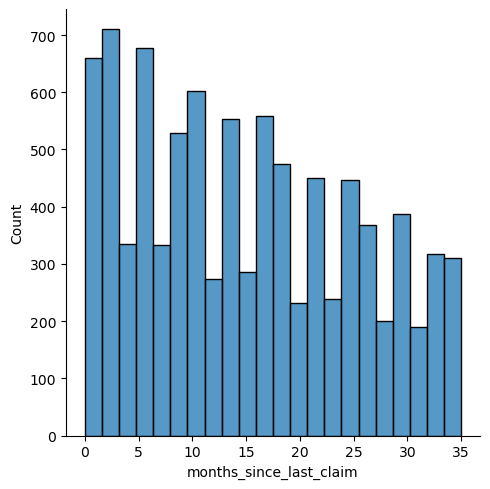

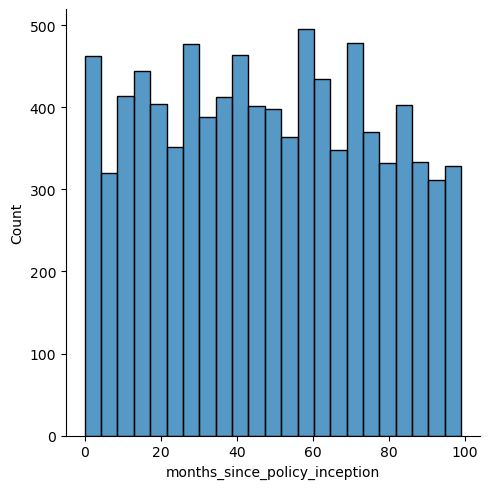

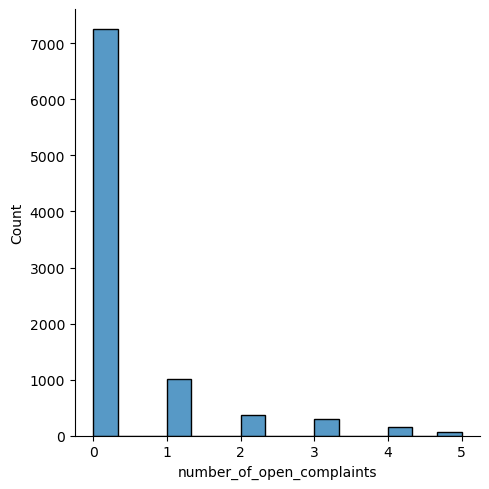

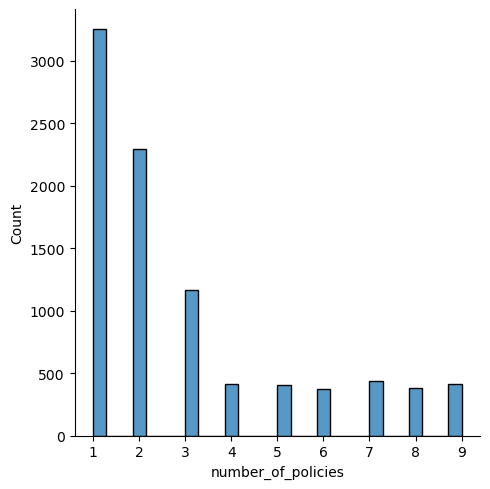

In [23]:
for column in numericals[discrete_variables]:
    sns.displot(numericals[column])
    plt.show()
    
    discrete_variables

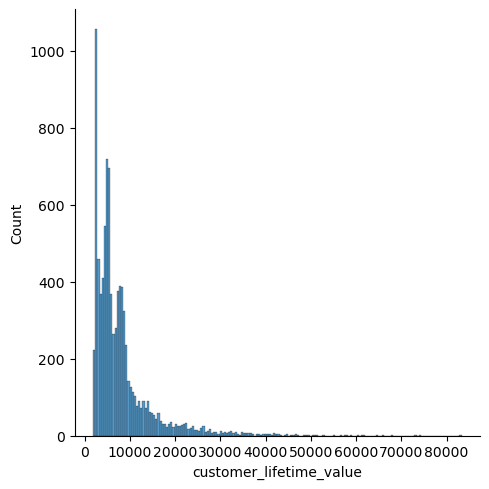

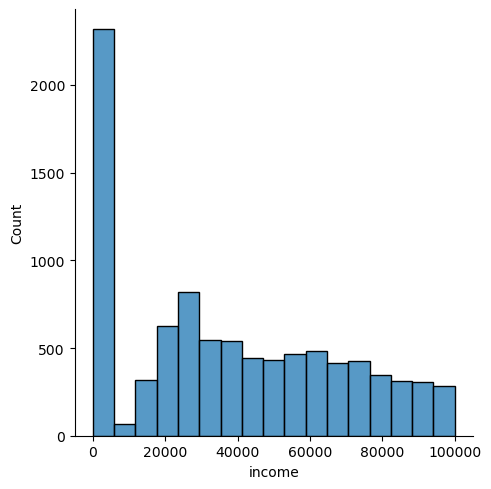

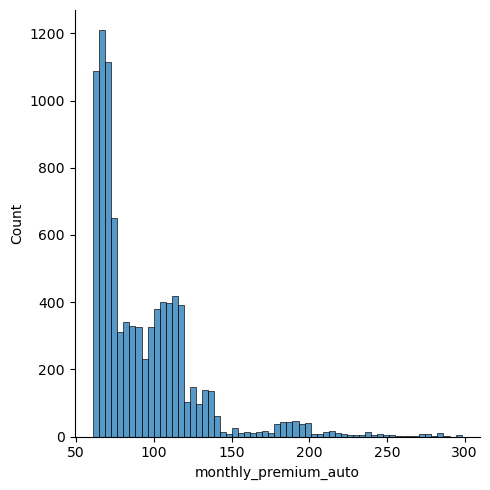

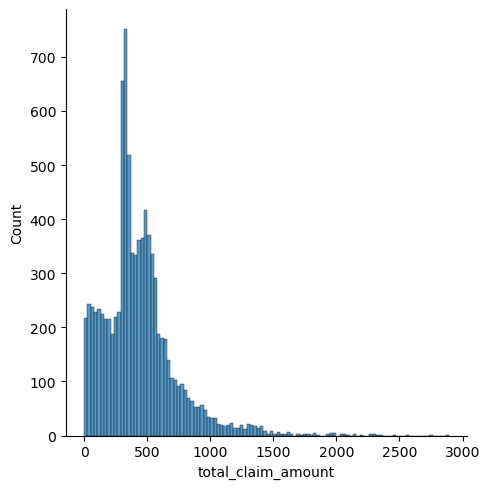

In [24]:
for column in numericals[continuous_variables]:
    sns.displot(numericals[column])
    plt.show()
    
    continuous_variables

 10. Comment what you can see in the plots.

11. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

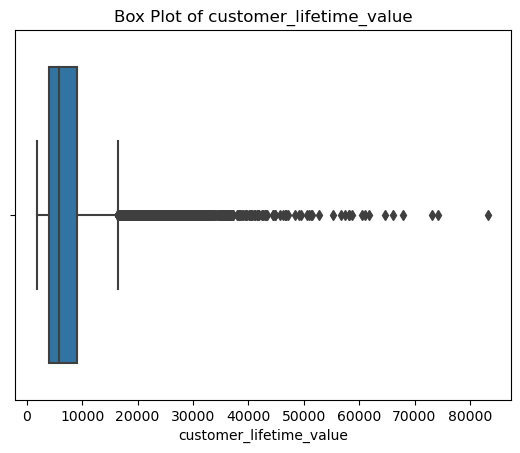

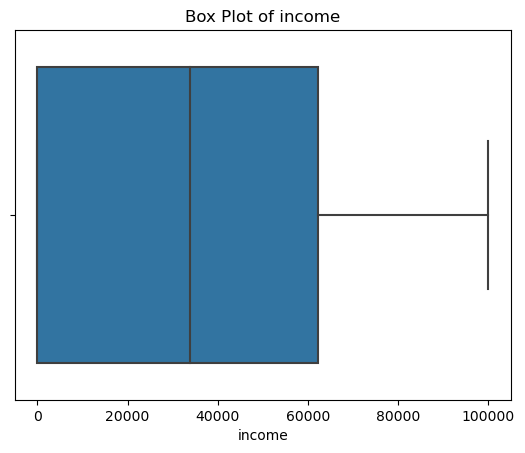

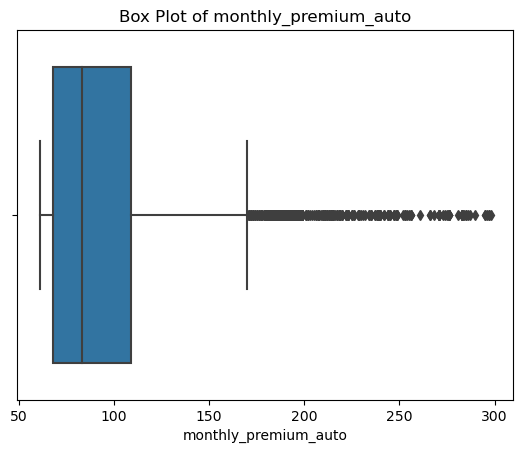

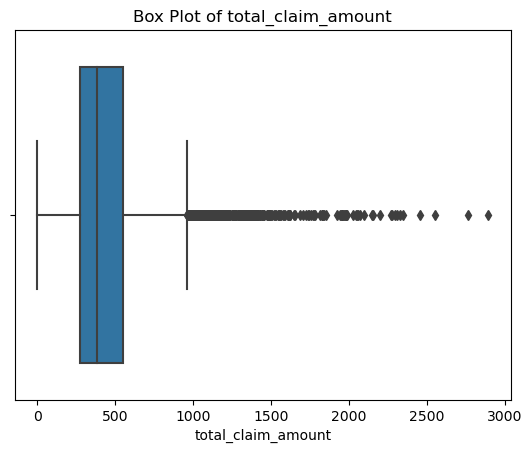

In [29]:
for column in continuous_variables:
    sns.boxplot(x=numericals[column])
    plt.title(f'Box Plot of {column}')
    plt.show()
        
    
  

In [ ]:
12. Did you find outliers? Comment what you will do with them. If you decide to remove them, do that now. Also, remove them from your main dataframe

In [25]:
def detect_outlier(column):
    
    q1, q3 = np.percentile(sorted(column), [25, 75])
 
   
    iqr = q3 - q1
 
    
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
 
    outliers = [x for x in column if x <= lower_bound or x >= upper_bound]
 
    return outliers
 

In [26]:
tca_outliers = detect_outlier(numerical_df['total_claim_amount'])


In [27]:
mpa_outliers = detect_outlier(numerical_df['monthly_premium_auto'])

In [28]:
len(mpa_outliers)

430

In [29]:
len(tca_outliers)

453

As the detected outliers have been gotten from my target colums I have decided to keep them and I'm going to include them without to distort my results.

How are I'm going to do it? applying a regression model to handle them.
Let's see who it works.

 13. Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.

In [ ]:
I have already checked the NAN values at the beginning, there is no NAN values.

In [31]:
data.to_csv('marketing_customer_value2.csv')


Summarize

Based on some descriptions that I found on  https://statisticsbyjim.com/basics/discrete-vs-continuous-data/ I have decided to assigned as
display(discrete_variables)  
['months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies']
display(discrete_variables)


display(continuous_variables)

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'total_claim_amount']
 
 Outliers
 
 I have decided not to remove them s

Categorical Cleaning Data

 2. Find all of the categorical data. Save it in a categorical_df variable.

In [75]:
categoricals = data.select_dtypes(include = object)

In [76]:
categoricals

,Customer,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [99]:
categoricals.columns = [col.lower().replace(' ', '_') for col in categoricals.columns]

In [35]:
categoricals.columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'employmentstatus', 'gender', 'location_code', 'marital_status',
       'policy_type', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [71]:
data['Effective To Date'] = pd.to_datetime(data['Effective To Date'])

In [100]:
categoricals 


,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [101]:
categoricals_df = categoricals
categoricals_df

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


3. Check for NaN values and decide what to do with them, do it now.

In [39]:
categoricals_df.isnull().sum()

customer            0
state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

In [40]:
categoricals_df.isna().sum()

customer            0
state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

 4. Check all unique values of columns.

In [42]:
categoricals_df.nunique()

customer            9134
state                  5
response               2
coverage               3
education              5
employmentstatus       5
gender                 2
location_code          3
marital_status         3
policy_type            3
policy                 9
renew_offer_type       4
sales_channel          4
vehicle_class          6
vehicle_size           3
dtype: int64

5. Check dtypes. Do they all make sense as categorical data?
Yes, it makes sense dtype object.

In [43]:
categoricals_df.dtypes

customer            object
state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

6. Does any column contain alpha and numeric data? Decide how to clean it and do it now.

In [44]:
categoricals_df = categoricals_df.drop(['customer'], axis=1)

In [ ]:
I have decided to drop columns effective to date and customer due to both ones are alpha numerical and they don't contain relevant data that caused an impact on our analysis.

In [46]:
categoricals_df.value_counts(dropna=False).head()

state       response  coverage  education             employmentstatus  gender  location_code  marital_status  policy_type    policy       renew_offer_type  sales_channel  vehicle_class  vehicle_size
California  Yes       Premium   Master                Employed          M       Rural          Married         Personal Auto  Personal L2  Offer1            Agent          Two-Door Car   Medsize         4
Arizona     Yes       Basic     Master                Employed          M       Rural          Divorced        Personal Auto  Personal L3  Offer2            Branch         Four-Door Car  Small           4
Oregon      No        Basic     Bachelor              Unemployed        F       Suburban       Single          Personal Auto  Personal L3  Offer1            Agent          Four-Door Car  Medsize         4
Washington  Yes       Basic     High School or Below  Unemployed        F       Suburban       Divorced        Personal Auto  Personal L3  Offer1            Web            Sports Car   

8. Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

In [102]:
categoricals_df

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [48]:
categoricals_df.policy.value_counts(dropna=False).head()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Name: policy, dtype: int64

In [49]:
categoricals_df.policy_type.value_counts(dropna=False).head()

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

In [50]:
categoricals_df.policy.shape

(9134,)

In [51]:
categoricals_df.policy_type.shape

(9134,)

9. Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

Yes, both columns could be combined but I prefer, first to consider the which it it the main objective of this analysis.
So, after this I can consider to combine these columns or not.

In [52]:
categoricals_df.policy.nunique()

9

In [53]:
categoricals_df.policy_type.nunique()

3

10. Save the cleaned catagorical dataframe as categorical.csv You will use this file again this week.

In [54]:
categoricals_df.to_csv('categoricals_df.csv')

 Lab | Feature extraction

In [ ]:
1. Open the categorical dataframe we created before.

In [103]:
categoricals_df = pd.read_csv('categoricals_df.csv')
categoricals_df.shape
categoricals_df.head()

,Unnamed: 0,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


2. Plot all the categorical variables with the proper plot. What can you see?

In [56]:
categoricals =categoricals_df

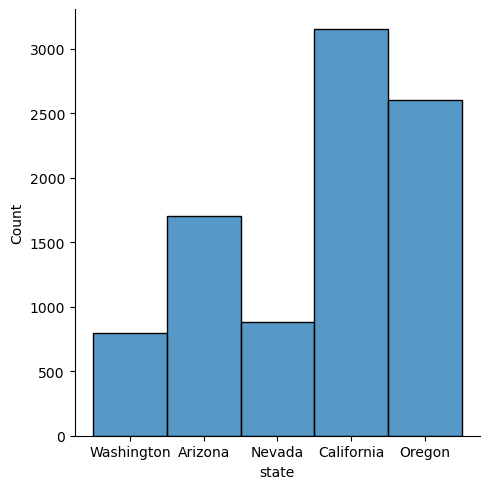

In [57]:
sns.displot(categoricals_df['state'])
plt.show()
 

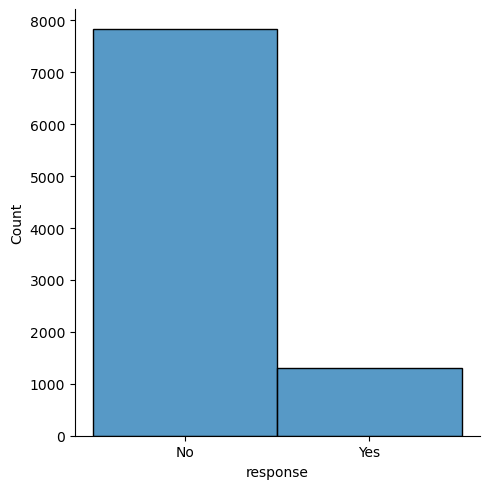

In [58]:
sns.displot(categoricals_df['response'])
plt.show()

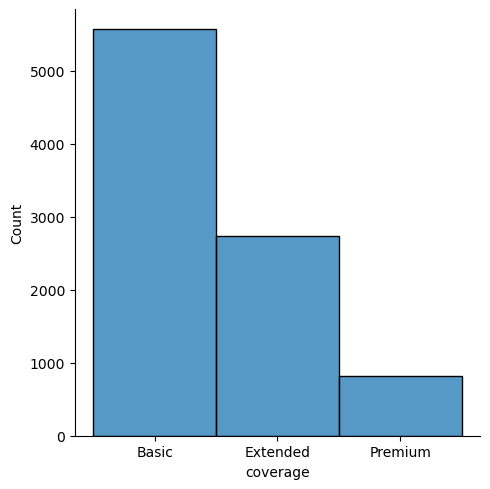

In [59]:
sns.displot(categoricals_df['coverage'])
plt.show()

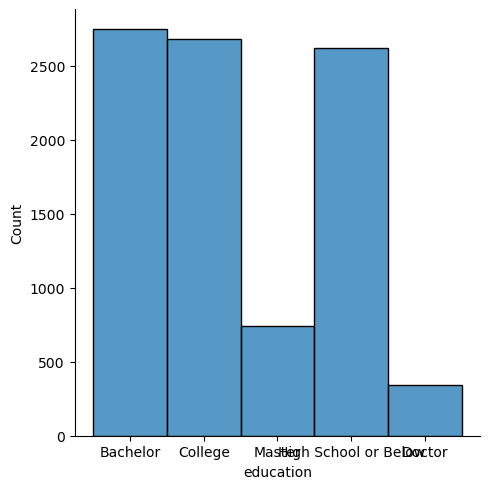

In [60]:
sns.displot(categoricals_df['education'])
plt.show()

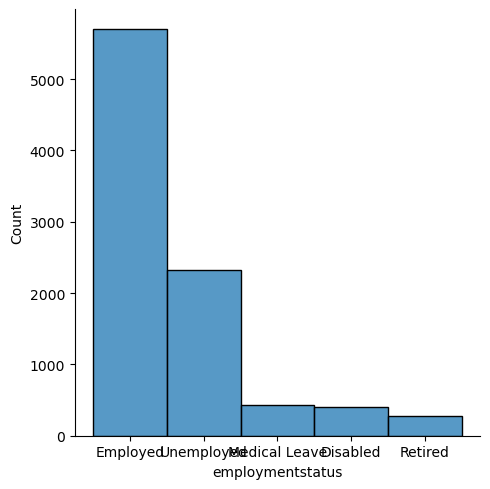

In [61]:
sns.displot(categoricals_df['employmentstatus'])
plt.show()

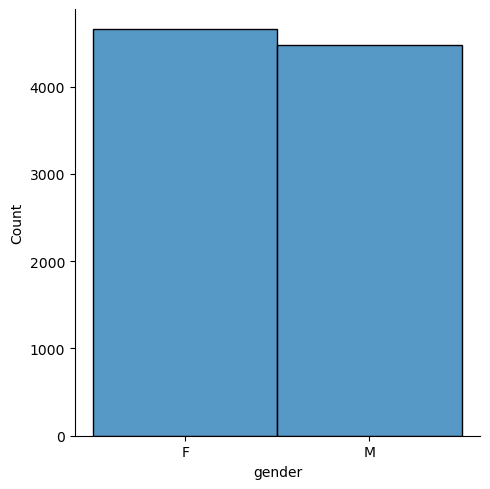

In [62]:
sns.displot(categoricals_df['gender'])
plt.show()

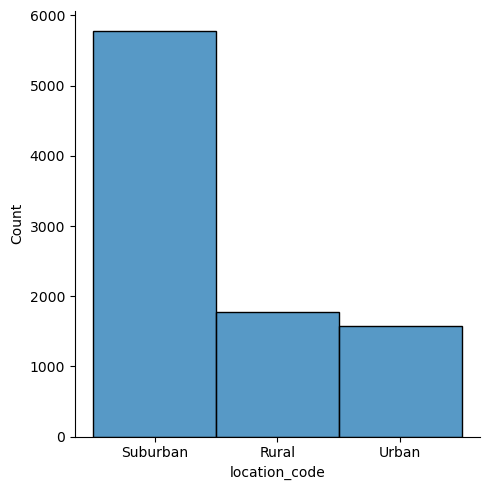

In [63]:
sns.displot(categoricals_df['location_code'])
plt.show()

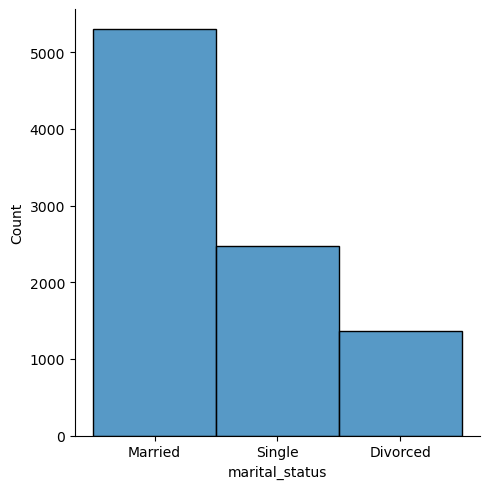

In [64]:
sns.displot(categoricals_df['marital_status'])
plt.show()

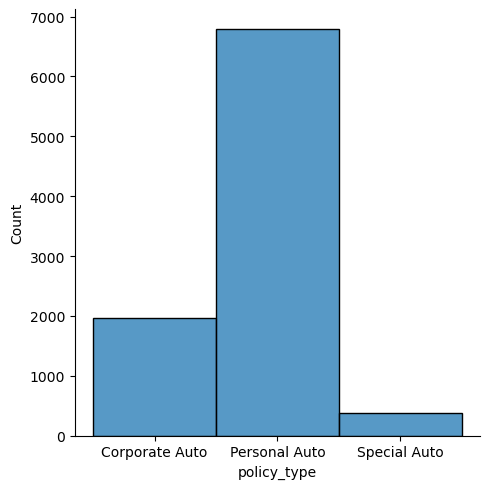

In [65]:
sns.displot(categoricals_df['policy_type'])
plt.show()

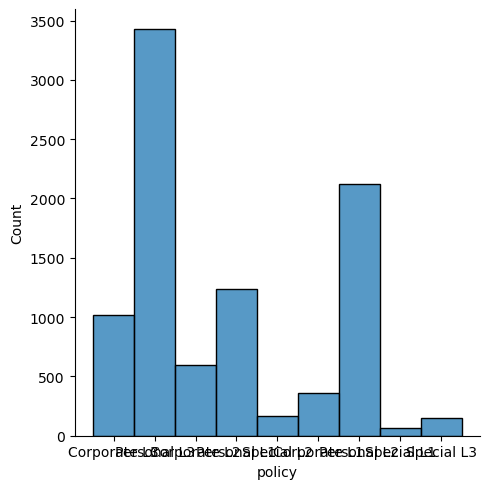

In [66]:
sns.displot(categoricals_df['policy'])
plt.show()

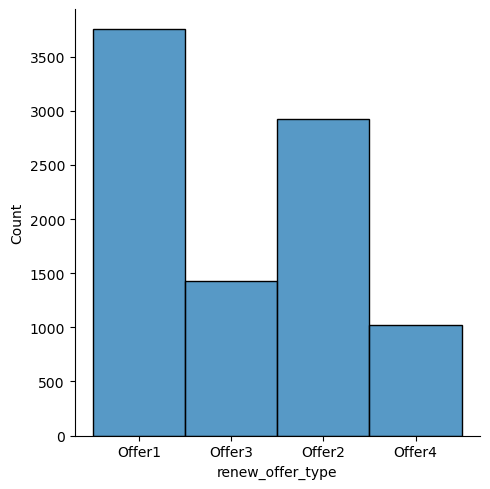

In [67]:
sns.displot(categoricals_df['renew_offer_type'])
plt.show()

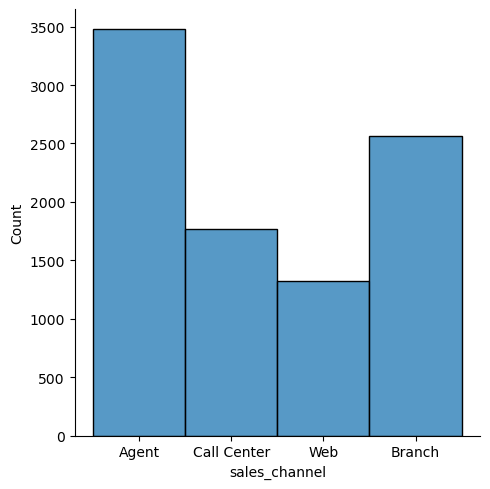

In [68]:
sns.displot(categoricals_df['sales_channel'])
plt.show()

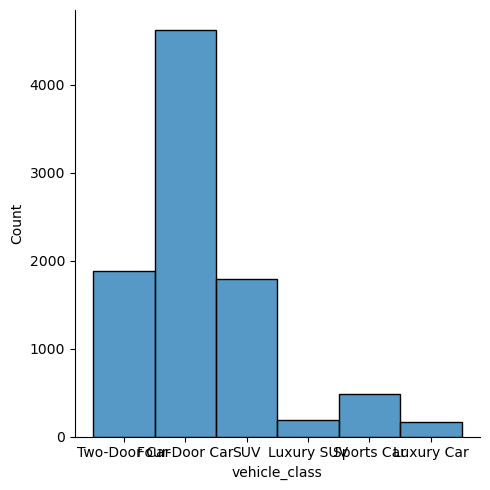

In [69]:
sns.displot(categoricals_df['vehicle_class'])
plt.show()

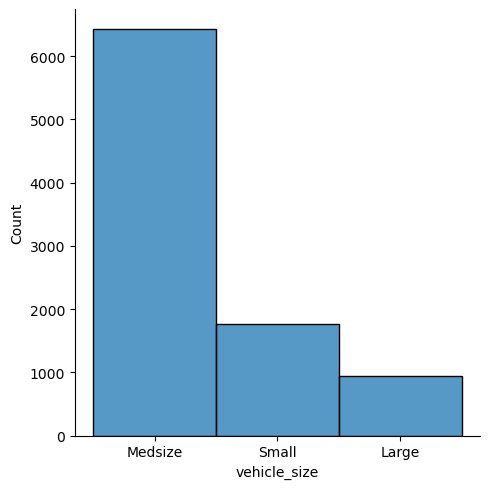

In [70]:
sns.displot(categoricals_df['vehicle_size'])
plt.show()

3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [ ]:
policy_type	policy	 We could convert these columns in just one.

4. Make any changes you feel are necessary.

In [105]:
categoricals_df['policies&types'] = categoricals_df['policy'] + categoricals_df['policy_type']

In [106]:
categoricals_df = categoricals_df.drop(['policy','policy_type'], axis=1)

In [107]:
categoricals_df

,Unnamed: 0,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,renew_offer_type,sales_channel,vehicle_class,vehicle_size,policies&types
0,0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Offer1,Agent,Two-Door Car,Medsize,Corporate L3Corporate Auto
1,1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Offer3,Agent,Four-Door Car,Medsize,Personal L3Personal Auto
2,2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Offer1,Agent,Two-Door Car,Medsize,Personal L3Personal Auto
3,3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Offer1,Call Center,SUV,Medsize,Corporate L2Corporate Auto
4,4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Offer1,Agent,Four-Door Car,Medsize,Personal L1Personal Auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Offer2,Web,Four-Door Car,Medsize,Personal L1Personal Auto
9130,9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Offer1,Branch,Four-Door Car,Medsize,Corporate L3Corporate Auto
9131,9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Offer1,Branch,Four-Door Car,Medsize,Corporate L2Corporate Auto
9132,9132,California,No,Extended,College,Employed,M,Suburban,Married,Offer3,Branch,Four-Door Car,Large,Personal L2Personal Auto


5. Plot time variable. Can you extract something from it?


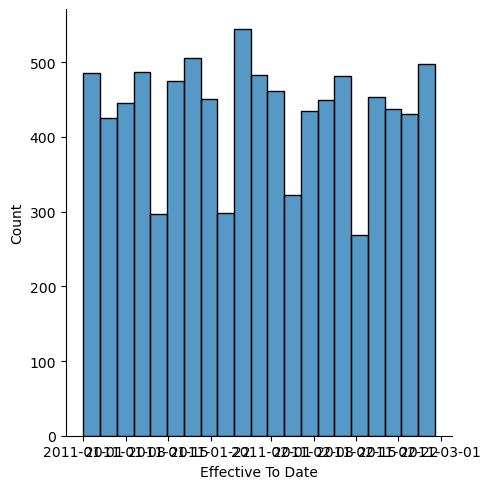

In [84]:
sns.displot(data['Effective To Date'])
plt.show()



 Not really, I cannot extract anything. The data is not clear for reading.

6. The time variable can be useful. You shoud transform its data into a more useful form. Hint: Day, week, and month as integers might be useful

In [85]:
data['Effective To Date'] = pd.to_datetime(data['Effective To Date'], errors='coerce')
data.head()


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [113]:
import time
from datetime import date

today = date.today()
today.strftime(format='%d-%m-%Y')

time.localtime(time.time())
time.gmtime(time.time())


time.struct_time(tm_year=2023, tm_mon=8, tm_mday=28, tm_hour=1, tm_min=15, tm_sec=2, tm_wday=0, tm_yday=240, tm_isdst=0)

In [115]:
data['Effective To Date'][0].day
data['Effective To Date'][0].month
data['Effective To Date'][0].year

2011